# Heartbeat Sounds

### [Classifying heartbeat anomalies from stethoscope audio](https://www.kaggle.com/kinguistics/heartbeat-sounds)

### Imports

In [1]:
import librosa
import os
import pandas as pd
import numpy as np
import fnmatch
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa.display
plt.ioff()

PATH = "C:\\Users\\frapo\\Downloads\\heartbeat-sounds"

### Functions

In [7]:
def load_wave(fname):
    y, sr = librosa.load(os.path.join(PATH, fname))
    return y

def build_dataset():
    path_to_ = os.path.join(PATH, "heartbeats.pkl")
    if os.path.isfile(path_to_):
        df = pd.read_pickle(path_to_)
    else:
        murmurs = ['set_b/'+ m for m in fnmatch.filter(os.listdir(PATH+'/set_b'), 'murmur*.wav')]
        murmurs += ['set_a/'+ m for m in fnmatch.filter(os.listdir(PATH+'/set_a'), 'murmur*.wav')]
        murmurs += murmurs
        labels = ["murmur"] * len(murmurs)
        
        normals = ['set_b/'+ m for m in fnmatch.filter(os.listdir(PATH+'/set_b'), 'normal*.wav')]
        normals += ['set_a/'+ m for m in fnmatch.filter(os.listdir(PATH+'/set_a'), 'normal*.wav')]
        labels += ["normal"] * len(normals)
        
        df = pd.DataFrame({"fname": murmurs+normals, "label": labels})
        df["array"] = df.fname.apply(load_wave)
        df["len_series"] = df["array"].apply(len)
        df.to_pickle(path_to_)
    
    return df

def repeat_to_length(arr, length):
    """Repeats the numpy 1D array to given length, and makes datatype float"""
    result = np.empty((length, ), dtype = 'float32')
    l = len(arr)
    pos = 0
    while pos + l <= length:
        result[pos:pos+l] = arr
        pos += l
    if pos < length:
        result[pos:length] = arr[:length-pos]
    return result

def explore_heartbeat(i):
    print(f"i: {i}")
    label = data.iloc[i].label
    fname = data.iloc[i].fname
    print(f"label: {label}; fname: {fname}")
    if label not in fname: return "Incostintent label"
    
    y, sr = librosa.load(os.path.join(PATH, fname))
    d = librosa.get_duration(y=y, sr=sr)
    print(f"Before padding sr: {sr}; len: {len(y)}; duration (s): {d}")
    
    y_ext = repeat_to_length(y, MAX_LEN)
    d = librosa.get_duration(y=y_ext, sr=sr)
    print(f"After padding sr: {sr}; len: {len(y_ext)}; duration: {d}")
    
    fig, ax = plt.subplots(figsize=(15, 3))
    librosa.display.waveplot(y, sr=sr)
    ax.set_title(f'label={label}; waveplot')
    
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    fig, ax = plt.subplots(figsize=(15, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    ax.set_title(f'label={label}; spectrogram: stft, amp2db, log')
    
    #my_dpi = 120
    #fig, ax = plt.subplots(figsize=(512/my_dpi, 512/my_dpi), dpi=my_dpi)
    
    #fig, ax = plt.subplots(figsize=(15, 5))
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='mel')
    
    #ax.axis('off')
    #plt.colorbar() 
    
    mfccs = librosa.feature.mfcc(y, sr=sr)
    fig, ax = plt.subplots(figsize=(15, 5))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='log')
    ax.set_title(f'label={label}; spectrogram: mfcc, log')
    #ax.axis('off')

    mel_spec = librosa.feature.melspectrogram(y, sr=sr, fmin=10, fmax=2000, power=1.0)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)    
    fig, ax = plt.subplots(figsize=(15, 5))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='log')
    ax.set_title(f'label={label}; spectrogram: melspectrogram, amp2db, log, fmax=2k hz')
    
    #plt.savefig(os.path.join(PATH, "test.png"), bbox_inches=None, pad_inches=0)
    plt.show()
    
    return fname, Xdb, y

def save_spectrograms(df):
    
    for i, row in df.iterrows():
        pass

In [3]:
data = build_dataset()
MAX_LEN = max(data["len_series"])

assert MAX_LEN == 614468
assert isinstance(data.array[0].sum(), np.float32)
assert data.shape == (609, 4)

In [4]:
data.sample(5)

,fname,label,array,len_series
394,set_b/normal__126_1306777102824_C.wav,normal,"[0.025894586, 0.028051903, 0.028640652, 0.0277...",91613
470,set_b/normal__175_1307987962616_B.wav,normal,"[0.0013529711, 0.0024457676, 0.003745941, 0.00...",48902
63,set_b/murmur__200_1308144251434_C.wav,murmur,"[0.015476435, 0.017053304, 0.017982682, 0.0184...",70329
338,set_b/normal_noisynormal_158_1306947254705_B1.wav,normal,"[-0.0017131807, -0.0017662458, -0.0016919031, ...",49211
472,set_b/normal__175_1307987962616_D.wav,normal,"[-0.0064964932, -0.007024674, -0.0068714786, -...",105344


i: 135
label: murmur; fname: set_b/murmur_noisymurmur_161_1307101199321_B.wav
Before padding sr: 22050; len: 249943; duration (s): 11.335283446712019
After padding sr: 22050; len: 614468; duration: 27.86702947845805


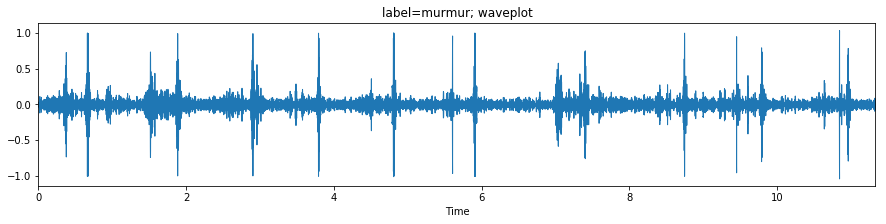

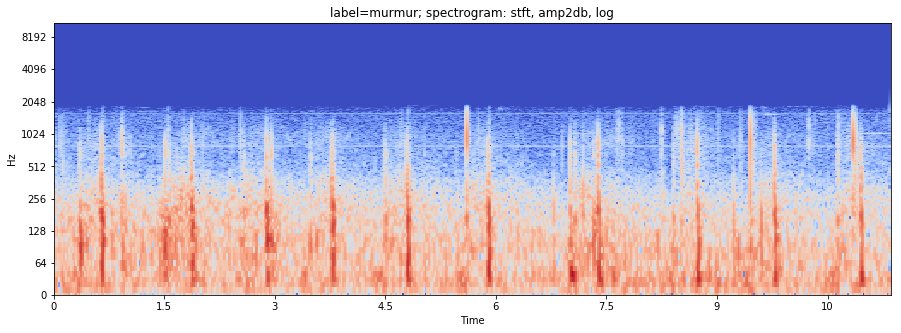

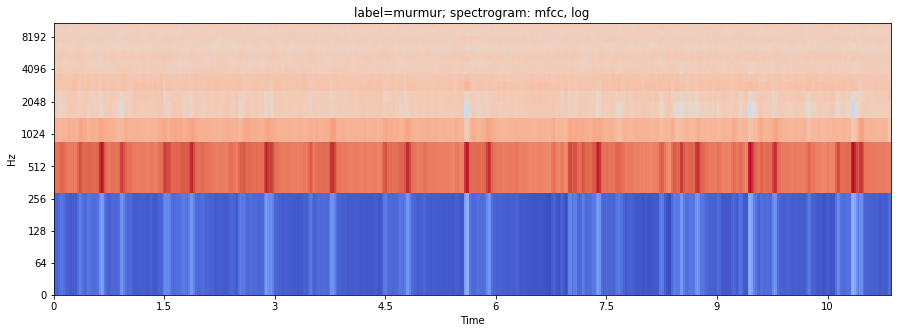

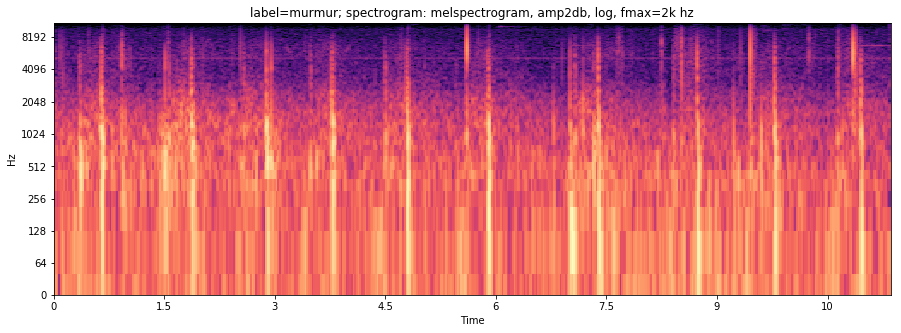

In [10]:
i = np.random.randint(low=0, high=(len(data)-1))
fname, Xdb, y = explore_heartbeat(i)
ipd.Audio(os.path.join(PATH, fname))